# IPL AND BOSTON DATASETS

In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv(r'E:\kiet files\4 semister\csv files\ipl dataset\IPL Matches 2008-2020.csv')
delivery=pd.read_csv(r'E:\kiet files\4 semister\csv files\ipl dataset\IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [4]:
delivery.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
delivery.shape

(193468, 18)

In [6]:
total_score_df=delivery.groupby(['id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [8]:
total_score_df.head(2)

,id,inning,total_runs
0,335982,1,222
2,335983,1,240


In [9]:
match_df=match.merge(total_score_df[['id','total_runs']])

In [10]:
match_df.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240


In [11]:
match_df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [12]:
teams=['Kolkata Knight Riders', 
      'Chennai Super Kings',
       'Royal Challengers Bangalore', 
       'Rajasthan Royals',
       'Kings XI Punjab', 
       'Mumbai Indians', 
       'Sunrisers Hyderabad', 
       'Delhi Capitals']

In [13]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [14]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(756, 18)

In [16]:
#match_df=match_df[match_df[]]

In [17]:
match_df=match_df[['id','venue','winner','total_runs']]

In [18]:
match_df.head(2)

,id,venue,winner,total_runs
0,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222
1,335983,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,240


In [19]:
delvery_df=match_df.merge(delivery,on='id')

In [20]:
delvery_df=delvery_df[delvery_df['inning']==2]

In [21]:
delvery_df.head(5)

,id,venue,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [22]:
delvery_df['current score']=delvery_df.groupby('id').cumsum()['total_runs_y']

In [23]:
delvery_df['run left']=delvery_df['total_runs_x']-delvery_df['current score'] +1

In [24]:
delvery_df.head(4)

,id,venue,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current score,run left
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221
124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220


In [25]:
delvery_df['ball_left']=126-(delvery_df['over']*6+delvery_df['ball'])

In [26]:
delvery_df['player_dismissed']=delvery_df['player_dismissed'].fillna('0')
delvery_df['player_dismissed']=delvery_df['player_dismissed'].apply(lambda x:x if x=="0"else x =="1")
delvery_df['player_dismissed']=delvery_df['player_dismissed'].astype('int')

wicket=delvery_df.groupby('id').cumsum()['player_dismissed'].values
delvery_df['wicket']=10-wicket
delvery_df.head(3)

,id,venue,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current score,run left,ball_left,wicket
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,88,10
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,87,10
123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,0,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,86,10


In [27]:
delvery_df.columns

Index(['id', 'venue', 'winner', 'total_runs_x', 'inning', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs',
       'total_runs_y', 'non_boundary', 'is_wicket', 'dismissal_kind',
       'player_dismissed', 'fielder', 'extras_type', 'batting_team',
       'bowling_team', 'current score', 'run left', 'ball_left', 'wicket'],
      dtype='object')

In [28]:
#current runrate
#crr=run/over
delvery_df['crr']=(delvery_df['current score']*6/(120-delvery_df['ball_left']))

In [29]:
delvery_df.head(2)

,id,venue,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,player_dismissed,fielder,extras_type,batting_team,bowling_team,current score,run left,ball_left,wicket,crr
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,88,10,0.000000
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,87,10,0.181818


In [30]:
#required run rate
delvery_df['rrr']=(delvery_df['run left']*6)/(delvery_df['ball_left'])


In [31]:
delvery_df.head(2)

,id,venue,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,fielder,extras_type,batting_team,bowling_team,current score,run left,ball_left,wicket,crr,rrr
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,88,10,0.000000,15.204545
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,87,10,0.181818,15.310345


In [32]:
def result(row):
    return 1 if row['batting_team']== row['winner'] else 0

In [33]:
delvery_df['result']=delvery_df.apply(result,axis=1)

In [34]:
delvery_df=delvery_df[['batting_team','bowling_team','venue','run left','ball_left','wicket','total_runs_x','crr','rrr','result']]

In [35]:
delvery_df.head(2)

,batting_team,bowling_team,venue,run left,ball_left,wicket,total_runs_x,crr,rrr,result
121,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,88,10,222,0.000000,15.204545,0
122,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,222,87,10,222,0.181818,15.310345,0


In [36]:
final_df=delvery_df.sample(delvery_df.shape[0])

In [37]:
final_df.sample()

,batting_team,bowling_team,venue,run left,ball_left,wicket,total_runs_x,crr,rrr,result
71784,Pune Warriors,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",123,111,10,126,2.666667,6.648649,0


In [38]:
final_df.dropna(inplace=True)

In [39]:
final_df=final_df[final_df['ball_left']!=0]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [41]:
x=final_df.iloc[:,:-1] 
y=final_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','venue'])
                      ],remainder='passthrough')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [45]:
#pipe.fit(x_train,y_train)

In [46]:
#y_pred=pipe.predict(x_test)

In [47]:
logi=LogisticRegression()

# Price Prediction On Real Data

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [49]:
boston=pd.read_csv(r'E:\kiet files\4 semister\csv files\boston house\Boston.csv')

In [50]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>],
       [<AxesSubplot:title={'center':'chas'}>,
        <AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'dis'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>],
       [<AxesSubplot:title={'center':'black'}>,
        <AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>]],
      dtype=object)

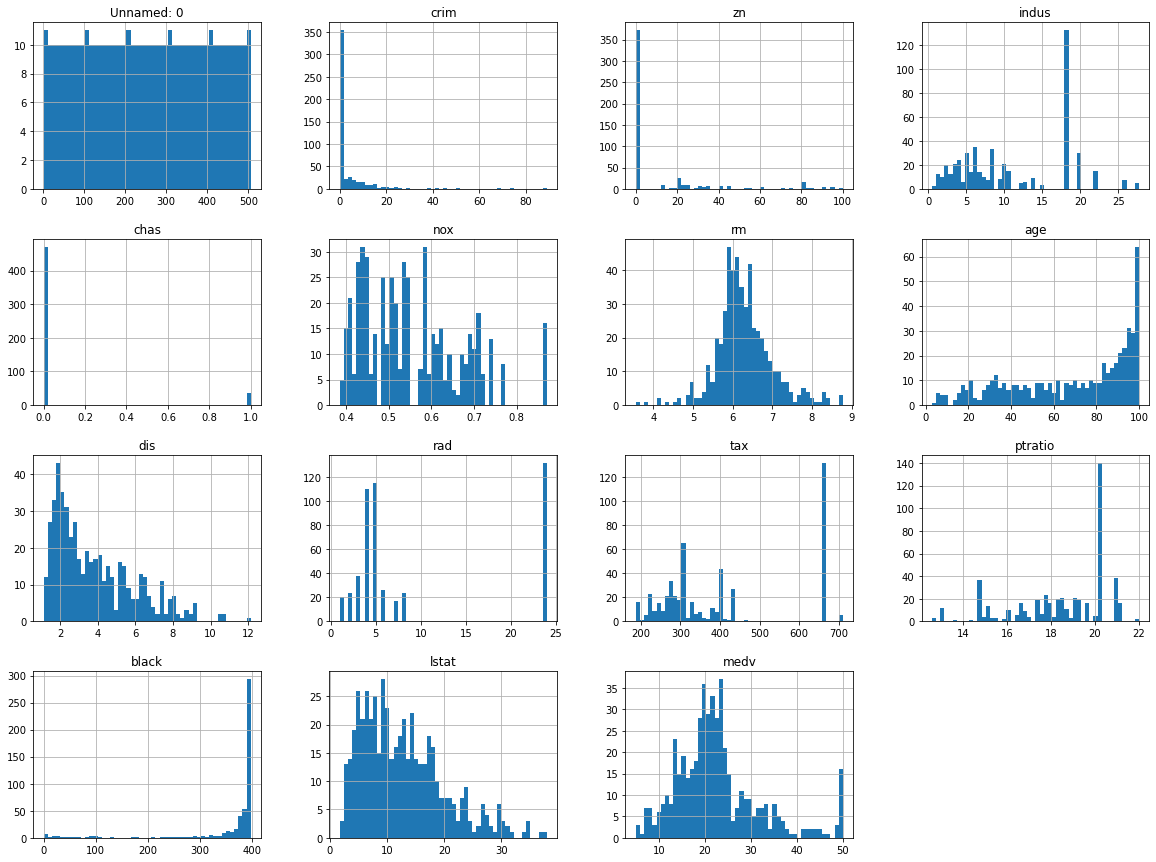

In [52]:
boston.hist(bins=50,figsize=(20,15))


In [53]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [54]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size]
    return data.iloc[train_indices],data.iloc[test_indices]

In [55]:
#train_set, test_set=split_train_test(boston,0.2)

In [56]:
#print(len(train_set),len(test_set))

In [57]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(boston,test_size=0.2,random_state=42)
print(len(train_set),len(test_set))

404 102


In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2 ,random_state=42)
for train_index, test_index in split.split(boston,boston['chas']):
    strat_train_set=boston.loc[train_index]
    strat_test_set=boston.loc[test_index]
    
# we use this Stra.... to balancly divide our data set on base on any single column


# looking for Correlations

In [59]:
corr_matrix=boston.corr()

In [60]:
# 1 strong positive corr relation  
# -1 weak negative corr relation
# if we increse price of house it depend on all values nearest to +1
corr_matrix['medv'].sort_values(ascending=False)

medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64

array([[<AxesSubplot:xlabel='medv', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='zn', ylabel='medv'>,
        <AxesSubplot:xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot:xlabel='medv', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='zn', ylabel='rm'>,
        <AxesSubplot:xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot:xlabel='medv', ylabel='zn'>,
        <AxesSubplot:xlabel='rm', ylabel='zn'>,
        <AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='lstat', ylabel='zn'>],
       [<AxesSubplot:xlabel='medv', ylabel='lstat'>,
        <AxesSubplot:xlabel='rm', ylabel='lstat'>,
        <AxesSubplot:xlabel='zn', ylabel='lstat'>,
        <AxesSubplot:xlabel='lstat', ylabel='lstat'>]], dtype=object)

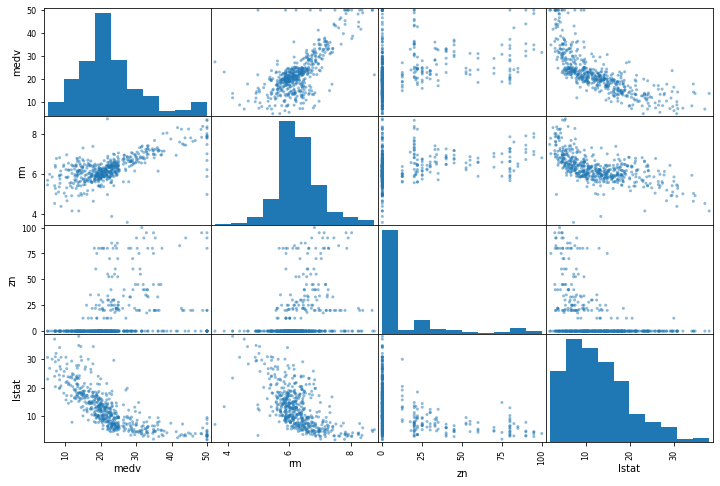

In [61]:
from pandas.plotting import scatter_matrix

# for corr relation graph
atribites=['medv','rm','zn','lstat']
scatter_matrix(boston[atribites],figsize=(12,8))

# trying Atrribute combination

In [62]:
boston['taxrm']=boston['tax']/boston['rm']

# for missing values 

In [63]:
# to take care missing attributes
#   1. get rid of missing data point
#   2. get rid of whole attribute
#   3. set the value to some value (0, mean 0r medium)

In [64]:
# 1
# boston.dropna(subset=['rm'],inplace=True)

#2
# boston.drop('rm',axis=1)

#3
#median=boston['rm'].median()
#boston.fillna(median) #if want to fill with median value

In [65]:
# for fillna in all data from median use below method
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(boston)
imputer.statistics_

array([2.53500000e+02, 2.56510000e-01, 0.00000000e+00, 9.69000000e+00,
       0.00000000e+00, 5.38000000e-01, 6.20850000e+00, 7.75000000e+01,
       3.20745000e+00, 5.00000000e+00, 3.30000000e+02, 1.90500000e+01,
       3.91440000e+02, 1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [66]:
x=imputer.transform(boston)
boston_tr=pd.DataFrame(x,columns=boston.columns)

In [67]:
boston_tr.head(2)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,taxrm
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0,45.019011
1,2.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6,37.688834


# Sciket learn Design

Primarily three types of objects
1. Estimators - It estimate parameter based on a dataset eg imputer.It has fit method and transform method fit method - fits dataset and calculate internal parameters

2. Transformes - tranform method takes input and returns output based on the learning from fit(). It also has a convenience function called fit transform() which fit and then transform.

3. Predictors - linearRegression model is an example of predictors. fit() and predict(). It also gives score() function which will evaluate the prediction

## feature scaling

Primarily two types of feature scaling methods
1. min-max scaling (Normalization)
   (value-min)/(max-min)
   - sklearn provides a class called MinMaxScaler for this
   
2. Standardization
   ( value - mean ) / std
   - sklearn provides a class Standard Scaler for this 

# creating Pipeline

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                     ('std_scaler',StandardScaler())])
#... add as many you can ( )

In [69]:
boston_num_tr=my_pipeline.fit_transform(boston_tr)


In [70]:
# an numpy array is created
boston_num_tr

array([[-1.72863116, -0.41978194,  0.28482986, ..., -1.0755623 ,
         0.15968566, -0.69357674],
       [-1.72178509, -0.41733926, -0.48772236, ..., -0.49243937,
        -0.10152429, -0.92761003],
       [-1.71493903, -0.41734159, -0.48772236, ..., -1.2087274 ,
         1.32424667, -1.05556065],
       ...,
       [ 1.71493903, -0.41344658, -0.48772236, ..., -0.98304761,
         0.14880191, -0.8814641 ],
       [ 1.72178509, -0.40776407, -0.48772236, ..., -0.86530163,
        -0.0579893 , -0.84799337],
       [ 1.72863116, -0.41500016, -0.48772236, ..., -0.66905833,
        -1.15724782, -0.68544738]])

# Selecting a desired model for predection

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [72]:
housing=strat_train_set.drop("medv",axis=1)
housing_label=strat_train_set['medv']

#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing,housing_label)

RandomForestRegressor()

# overfit in decisionTree regresser

## Using better evaluation technique - Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing,housing_label,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [74]:
def print_score(scores):
    print('score',scores)
    print('mean',scores.mean())
    print('Standard deviation',scores.std)

In [75]:
print_score(rmse_scores)

score [2.88499932 2.56446115 4.45276833 2.61286791 3.41870836 2.55890289
 5.11534297 3.29946856 3.44409746 2.99967663]
mean 3.3351293589538242
Standard deviation <built-in method std of numpy.ndarray object at 0x00000219A39A9C90>


## saving the model

In [76]:
from joblib import dump, load
dump(model,'filename.joblib')

['filename.joblib']

In [78]:
# x_test=strat_test_set.drop('medv',axis=1)
# y_test=strat_test_set['medv']
# x_test_prepared=my_pipeline.transform(x_test)
# final_predection=model.predict(x_test_prepared)
# final_mse= mean_squared_error(y_test,final_predection)
# final_rmse=np.sqrt(final_mse)

In [79]:
# for predection just put the values
model=load('filename.joblib')


In [80]:
# features=np.array([[2,435,676,756,876,8,897,89,7,1,213,124,23,4  ]])
# model.predict(features)